#**Artigo de conclusão da Formação em Cientista de Dados**

NOME DO ALUNO: LUIZ ORESTES RUZENE DA SILVA




TURMA: 6


# **Resumo**



Este projeto visa construir um modelo de Deep Learning utilizando Python para que irá prever o comportamento futuro dos preços das ações.

Embora prever o preço real de uma ação seja algo muito complexo, podemos construir um modelo que preveja se o preço vai subir ou descer.

Neste projeto será utilizado uma rede neural recorrente artificial chamada Long Short Term Memory (LSTM)

* **Arquitetura de Redes Neurais Long Short Term Memory (LSTM)**

**Precisamos de Memória**

Os humanos não começam a pensar do zero a cada segundo. Você entende cada palavra com base em sua compreensão das palavras anteriores. Você não joga tudo fora e começa a pensar de novo a cada palavra que você lê. Seus pensamentos têm persistência.

As redes neurais tradicionais não podem fazer isso, o que dificulta sua aplicação para resolver diversos problemas.

**Redes neurais recorrentes (RNNs)** resolvem esse problema. São redes com loops, permitindo que as informações persistam.

Uma rede neural recorrente pode ser imaginada como múltiplas cópias da mesma rede, cada uma passando uma mensagem a um sucessor.

A LSTM possui uma estrutura em cadeia que contém quatro redes neurais e diferentes blocos de memória chamados células.

Fonte: https://www.deeplearningbook.com.br/arquitetura-de-redes-neurais-long-short-term-memory/



links:

https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

https://www.youtube.com/watch?v=QIUxPv5PJOY



# **Objetivo**

Prever o preço de fechamento das ações de uma empresa, neste caso utilizaremos a ação do Banco do Brasil SA (BBAS3) utilizando a cotação dos últimos 60 dias.


# **Execução do projeto**










Forneça detalhes das etapas e ferramentas para o projeto. Quais bases de dados foram usadas? Quais dados elas continham? Qual foram os critérios de seleção do Modelo, se houver um modelo. 


In [ ]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3 MB 6.1 MB/s 
     |████████████████████████████████| 294 kB 47.0 MB/s 
     |████████████████████████████████| 142 kB 59.6 MB/s 


Importando **NumPy** para computação científica, **Matplotlib** para gráficos de plotagem, **Pandas** para auxiliar no carregamento e manipulação de nossos conjuntos de dados, **Math** para funções matemáticas, **Datetime** fornece as classes para manipulação de datas e horas e **Time** provê várias funções relacionadas à tempo.

* Importando Bibliotecas

In [ ]:
# Importação e Preparação
import time
import datetime
import numpy as np
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Plotagem e visualização
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Modelagem
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

#**Chave de Acesso API Alpha_Vantage**

In [ ]:
ALPHAVANTAGE_API_KEY = 'AQWHIPKLC425SXC5'

#**Acessando API**

In [ ]:
api_key = TimeSeries(key=ALPHAVANTAGE_API_KEY, output_format='pandas')

* Carregando o conjunto de dados

In [ ]:
# Definir o ticker da ação que deseja prever
dados = dados, meta_dados = api_key.get_daily('BBAS3.SAO', outputsize='full')
dados

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-09-27,29.26,30.21,29.17,29.87,18689900.0
2021-09-24,29.27,29.55,29.17,29.22,11986900.0
2021-09-23,29.51,29.74,29.27,29.45,16136100.0
2021-09-22,29.00,29.80,28.90,29.38,24515400.0
2021-09-21,28.48,28.76,28.10,28.71,13645400.0
...,...,...,...,...,...
2005-01-07,31.30,31.95,30.75,31.00,76595.0
2005-01-06,31.69,31.70,30.05,31.30,203688.0
2005-01-05,32.31,32.31,30.00,31.70,256321.0


* Renomeando cabeçalho do dataframe

In [ ]:
dados = dados.rename(columns = {'1. open': 'Open', '2. high': 'High', '3. low':'Low','4. close':'Close', '5. volume':'Volume'}, inplace = False)
df = dados.sort_values(by=['date'])
df


,Open,High,Low,Close,Volume
date,,,,,
2005-01-03,32.52,33.44,32.50,33.00,150523.0
2005-01-04,33.00,33.27,32.20,32.20,332154.0
2005-01-05,32.31,32.31,30.00,31.70,256321.0
2005-01-06,31.69,31.70,30.05,31.30,203688.0
2005-01-07,31.30,31.95,30.75,31.00,76595.0
...,...,...,...,...,...
2021-09-21,28.48,28.76,28.10,28.71,13645400.0
2021-09-22,29.00,29.80,28.90,29.38,24515400.0
2021-09-23,29.51,29.74,29.27,29.45,16136100.0


**Open:** é o preço inicial/abertura

**Close:** é o preço final de uma ação em um determinado dia de negociação.
 
**High e Low:** representam os preços mais altos e mais baixos de um determinado dia.

* Visualizando o histórico do preço de fechamento da ação

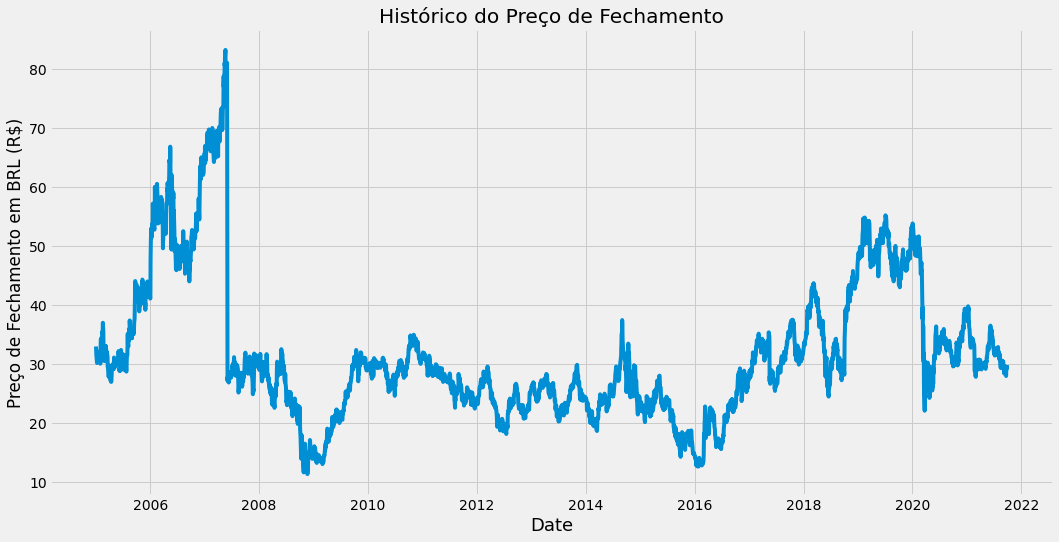

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Histórico do Preço de Fechamento')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Preço de Fechamento em BRL (R$)')
plt.show()

* Divisão de características e rótulo


In [ ]:
# Criando um novo dataframe apenas com a coluna 'Close' = Preço de Fechamento
data = df.filter(['Close'])
# Convertendo o dataframe para numpy array
dataset = data.values
dataset

array([[33.  ],
       [32.2 ],
       [31.7 ],
       ...,
       [29.45],
       [29.22],
       [29.87]])

* Definindo o percentual do nosso conjunto de dados que será utilizado para treinamento (80%) e teste (20%)

In [ ]:
# Vamos utilizar 80% dos nossos dados para treinar o modelo e 20% para testar
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

3302

* Normalizando os dados do dataframe

O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

Em nosso projeto com a normalizar os dados esperamos que o modelo venha a performar melhor.

Usaremos o MinMaxScaler do Scikit-Learn e dimensionar nosso conjunto de dados para números entre zero e um.

https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa

In [ ]:
# Dimensionando os atributos em um intervalo entre 0 e 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.30094787],
       [0.28979649],
       [0.28282687],
       ...,
       [0.25146362],
       [0.2482576 ],
       [0.25731809]])

* Criando o conjunto de dados de treinamento

In [ ]:
# Selecionando os dados de 'Scaled_data' do index 0 até traing_data range e todas as colunas.
train_data = scaled_data[0:training_data_len, :]

# Dividindo o conjunto de dados entre x_train and y_train
# Listas vazias
x_train = [] 
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) # Contém os últimos 60 valores (index 0 ~ 59)
  y_train.append(train_data[i, 0]) # Valor que queremos prever, neste caso seria o 61º valor
  if i<=61:
    print(x_train) 
    print(y_train) 
    print()
# No resultado abaixo podemos verificar 2 loops o 1º com valor <=60 e posteriormente <=61

[array([0.30094787, 0.28979649, 0.28282687, 0.27725118, 0.27306942,
       0.26191804, 0.26331196, 0.2660998 , 0.26554224, 0.27306942,
       0.27167549, 0.2751603 , 0.28840256, 0.27446334, 0.2660998 ,
       0.27725118, 0.27836632, 0.27028157, 0.26400892, 0.27167549,
       0.26024533, 0.28282687, 0.2967661 , 0.31781433, 0.3218567 ,
       0.32046278, 0.31767494, 0.30791748, 0.33579593, 0.32896571,
       0.34276554, 0.35670477, 0.33732924, 0.30722052, 0.28868135,
       0.29955394, 0.28854196, 0.27306942, 0.2662392 , 0.27028157,
       0.27404516, 0.27725118, 0.29760245, 0.30234179, 0.29119041,
       0.30094787, 0.2967661 , 0.28909953, 0.2842208 , 0.27864511,
       0.28700864, 0.28561472, 0.27752997, 0.26749373, 0.25202119,
       0.25494842, 0.23752439, 0.22916086, 0.24226373, 0.2535545 ])]
[0.25564538611653187]

[array([0.30094787, 0.28979649, 0.28282687, 0.27725118, 0.27306942,
       0.26191804, 0.26331196, 0.2660998 , 0.26554224, 0.27306942,
       0.27167549, 0.2751603 , 0.28

* Convertendo x_train e y_train em Numpy array

In [ ]:
x_train, y_train = np. array(x_train), np.array(y_train)

* LSTM Model requisita que os dados sejam 3D e os dados atuais são 2D.


In [ ]:
x_train.shape

(3242, 60)

In [ ]:
# Transformando os dados de 2D para 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3242, 60, 1)

* Construindo o Modelo LSTM (Long and Short Term Memory)

https://keras.io/guides/sequential_model/

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

https://keras.io/api/layers/core_layers/dense/



In [ ]:
# Importando bibliotecas
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Definindo o modelo
model = Sequential()
# Adionando Leyer ao modelo
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

* Compilando o modelo e adicionando um otimizador (Adam) e função de perda (Mean Squared Error)

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

* Treinando o modelo

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3242/3242 [==============================] - 100s 30ms/step - loss: 0.0024


* Criando o conjunto de dados de teste

In [ ]:
# Criando um novo array considerando os valores do index 3241 - 60 até 4127
test_data = scaled_data[training_data_len -60:, :]  
# Criando um novo conjunto de dados para x_test e y_test
x_test=[]
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

* Convertendo x_test e y_test em Numpy array

In [ ]:
x_test = np.array(x_test)

* LSTM Model requisita que os dados sejam 3D e os dados atuais são 2D.

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

* Prever novas amostras

In [ ]:
# Obtendo o preços da ação previsto no modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

* Avaliando o resultado do modelo

**Raiz do Erro Quadrático Médio (RMSE)**

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

https://www.linkedin.com/pulse/rmse-ou-mae-como-avaliar-meu-modelo-de-machine-learning-rezende/?originalSubdomain=pt

In [ ]:
# RMSE Index: quanto menor o resultado melhor

# Passa os valores reais utilizados para teste e os valores previstos pelo modelo
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE é", rmse)

RMSE é 0.8203243075284092


* Visualizando o resultado do modelo de predição

In [ ]:
# Plotar dados
train = data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


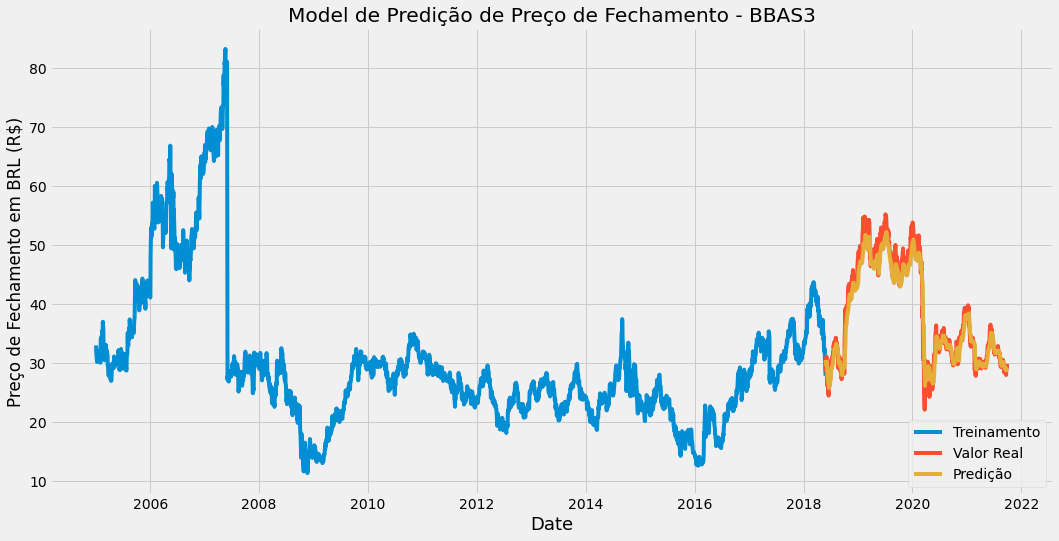

In [ ]:
# Visualizar gráfico
plt.figure(figsize=(16,8))
plt.title('Model de Predição de Preço de Fechamento - BBAS3')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Preço de Fechamento em BRL (R$)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Treinamento', 'Valor Real', 'Predição'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted pricess
valid

,Close,Predictions
date,,
2018-05-29,28.51,30.536148
2018-05-30,30.37,29.860498
2018-06-01,30.66,29.723469
2018-06-04,31.10,29.848627
2018-06-05,29.12,30.113585
...,...,...
2021-09-21,28.71,28.896950
2021-09-22,29.38,28.772396
2021-09-23,29.45,28.836231


* Qual seria a previsão do preço de fechamento da ação do Banco do Brasil (BBAS3) no dia 28/09/2021

In [ ]:
# Rodar o modelo de predição do preço de fechamento da ação BBAS3 para o dia 28/09/2021

# Definir o ticker da ação que deseja prever
dados = dados, meta_dados = api_key.get_daily('BBAS3.SAO', outputsize='full')

# Renomeando cabeçalho do dataframe
dados = dados.rename(columns = {'1. open': 'Open', '2. high': 'High', '3. low':'Low','4. close':'Close', '5. volume':'Volume'}, inplace = False)

# Classicando o dataset por data crescente
df = dados.sort_values(by=['date'])

# Criando um novo dataframe apenas com a coluna 'Close' = Preço de Fechamento
data = df.filter(['Close'])

# Convertendo o dataframe para numpy array
#dataset = data.values

# Obter o preço de fechamento dos últimos 60 dias e converter o datafram em um array
last_60_days = data[-60:].values
# Normalizar os dados
last_60_days_scaled = scaler.transform(last_60_days)
# Criar uma lista vazia
X_test = []
# Concatenar com os últimos 60 dias
X_test.append(last_60_days_scaled)
# Converter o conjunto de dados de X_test para numpy array
X_test = np.array(X_test)
# Transformar os dados de 2D para 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Obtenha o preço previsto em escala
pred_price = model.predict(X_test)
# Desfazer a escala
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[29.214901]]


# **Conclusões**



Com base nos resultados apresentados pelo modelo considerando a métrica de avaliação adotada o RSME, cujo resultado foi de 0.82, nos leva a crer que conseguimos atingir um bom resultado.
Quando avaliamos o resultado do modelo de predição sobre a base de teste nos últimos 5 dias (21/09~27/09) a variação média entre o preço real vs. o preço previsto ficou 0,43 centavos, ou seja, uma variação média percentual de 1,5%. Acredito que este resultado pode contribuir bastante no gerenciamento de risco em determinadas estratégias.
Nunca é demais deixar o "disclaimer" de que este modelo em hipótese alguma, deve ser utilizado como forma única para tomada de decisão no mercado financeiro.
Entretanto, pude perceber o poder das ferramentas de Machine Learning/Deep Learninig e como posso aplica-las em diferentes problemas.
Em resumo, pretendo seguir na evolução deste modelo adicionando a esta análise novos modelos que incluam indicadores de análise técnica, a fim de indicar tendência, momentum e até mesmo viés de compra ou venda. Informações estas que possam auxiliar na tomada de decisão. 


# **Referências e Notebooks**

[API Alpha Vantage]

https://www.youtube.com/watch?v=kB4jCoVyLRI

[LSTM Model]

https://www.deeplearningbook.com.br/arquitetura-de-redes-neurais-long-short-term-memory/

https://medium.com/turing-talks/turing-talks-27-modelos-de-predi%C3%A7%C3%A3o-lstm-df85d87ad210

https://www.monolitonimbus.com.br/machine-learning-de-series-temporais-lstm/

https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

https://www.youtube.com/watch?v=QIUxPv5PJOY

https://www.ti-enxame.com/pt/deep-learning/por-que-o-tamanho-do-lote-de-keras-lstm-usado-para-previsao-tem-que-ser-o-mesmo-que-o-tamanho-do-lote-de-ajuste/832473565/

[Tensorflow]

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM


[Keras]

https://keras.io/guides/sequential_model/

https://keras.io/api/layers/recurrent_layers/lstm/

https://keras.io/api/layers/core_layers/dense/


[Adam Optimization Algorithm for Deep Learning]

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

[Raiz do Erro Quadrático Médio (RMSE)]

https://www.linkedin.com/pulse/rmse-ou-mae-como-avaliar-meu-modelo-de-machine-learning-rezende/?originalSubdomain=pt


https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

https://www.kite.com/python/answers/how-to-take-root-mean-square-error-(rmse)-in-python#:~:text=Call%20sklearn.,squared%20error%20of%20the%20data.&text=sqrt(number)%20with%20number%20as,the%20RMSE%20of%20the%20data


Notebook do Projeto, disponível em: www.site.com.br
